#MULTIPLE LINEAR REGRESSION

In [2]:
# importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')

In [8]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


# Dataset Description:

r* Dataset Description:
* The dataset consists of the following variables:
* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic ( (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax:
* Price: Offer Price in EUROsice in EUROs


#Taskes:



# 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.


In [9]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [12]:
df.shape

(1436, 11)

In [13]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


#KEY POINTS:



From above table, I understand that
* **Price:** The min proce of a car is 4350 dollars and max is 32500. The mean and median of price are 10730, 9900.
* **Age :** The min age of a car is 1 and max age is 80. The mean and medians of age are 56,61.
* By considering the above 2 columns mean and median, I conclude that those both are not normally distributed.
* **KM :** The min kilo meters travelled by a car is 1 and max KM is 243000. The average distance travelled by a car is 68533.25 and max cars travelled the distance of 63389 KM.
* **HP :** The min HP of a car is 69 and max HP is 192. Here HP represents the Horse power of a car. For some models of a cars with specific HP. Like mobiles have version. By this we can't do anything with mean and median of the HP.
* **Automatic :** It contains two categories one Yes(1) and No(0).
* **CC :** It is also like HP.
* **Doors :** The cars contains min of 2 doors and max of 5 doors.
* **Cylinder :** By considering the cylinder column there is only one category of 4.
* **Gears :** The min no of gears for a car is 3 and max is 6.
* **Weight :** A car contains min of 1000 kg's and max of 1615 kg's. The avg weight of a cars is 1072 kg's.

In [14]:
df.drop(index = 113, inplace = True) # droping the duplicat

In [15]:
df[df.duplicated()] # their is no duplicat

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight


In [16]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [17]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


* their is no null values in this data

In [18]:
fig = px.box(df[df.describe().columns],template='plotly_dark') #Creating the box plot for data for finding the outliers
fig.update_layout(title='Box Plot for Toyoto Dataset')
fig.show()


**From above KM column contains the max outliers in the column and next is price**

In [19]:
def outliers_detection(df): #Creating the function for detecting the outliers in the dataset
    outliers = pd.DataFrame() #Creating the dataframe to append the outliers
    for i in df.describe().columns:
        q1 = df[i].quantile(0.25) #Finding the first quantile of column
        q3 = df[i].quantile(0.75) #Finding the third quantile of column

        IQR = q3 - q1 #Finding the Interquartile range

        lower_bound = q1 - (1.5 * IQR) #finding the lower bound of column
        upper_bound = q3 + (1.5 * IQR) #finding the upper bound of column

        out = df[(df[i]<lower_bound) | (df[i]>upper_bound)] #Finding the outliers in the dataset
        outliers = pd.concat([outliers,out]) #Append the outliers to dataframe

    return outliers #Return the outliers from the dataset

In [20]:
outliers = outliers_detection(df)
toyoto_outliers = outliers.drop_duplicates().reset_index().drop('index',axis=1) #Create a separate dataframe for outliers by droping duplicates
toyoto_outliers

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
1,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
2,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
3,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
4,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
...,...,...,...,...,...,...,...,...,...,...,...
332,10450,65,36000,Petrol,110,0,1600,3,4,6,1065
333,10950,62,35512,Petrol,110,0,1600,3,4,6,1065
334,10750,60,31480,Petrol,110,0,1600,3,4,6,1065
335,12450,44,74172,Petrol,110,0,1600,5,4,5,1615


In [21]:
data = df[~df.index.isin(outliers.index)] #Creating dataframe by removing the outliers in the dataset
toyoto = data.reset_index().drop('index',axis=True)
toyoto

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,12950,23,71138,Diesel,69,0,1900,3,4,5,1105
1,16750,24,25563,Petrol,110,0,1600,3,4,5,1065
2,16950,30,64359,Petrol,110,0,1600,3,4,5,1105
3,15950,30,67660,Petrol,110,0,1600,3,4,5,1105
4,15950,28,56349,Petrol,110,0,1600,3,4,5,1120
...,...,...,...,...,...,...,...,...,...,...,...
1093,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1094,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1095,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1096,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [22]:
toyoto.drop(columns='Gears',inplace=True) #Removing the gears column because it cointains only one unique value

In [23]:
print(toyoto.shape)
toyoto.head()

(1098, 10)


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Weight
0,12950,23,71138,Diesel,69,0,1900,3,4,1105
1,16750,24,25563,Petrol,110,0,1600,3,4,1065
2,16950,30,64359,Petrol,110,0,1600,3,4,1105
3,15950,30,67660,Petrol,110,0,1600,3,4,1105
4,15950,28,56349,Petrol,110,0,1600,3,4,1120


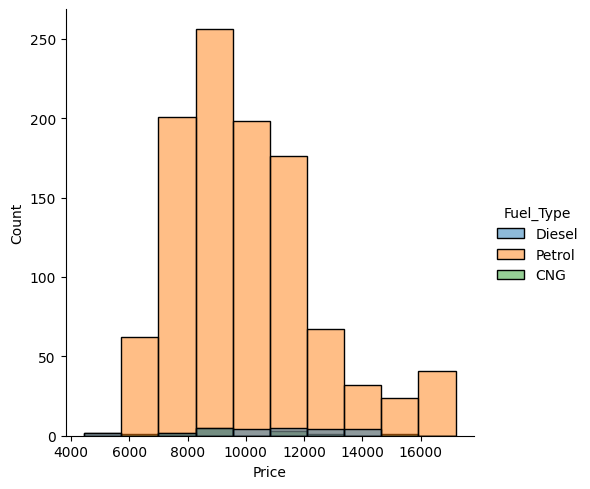

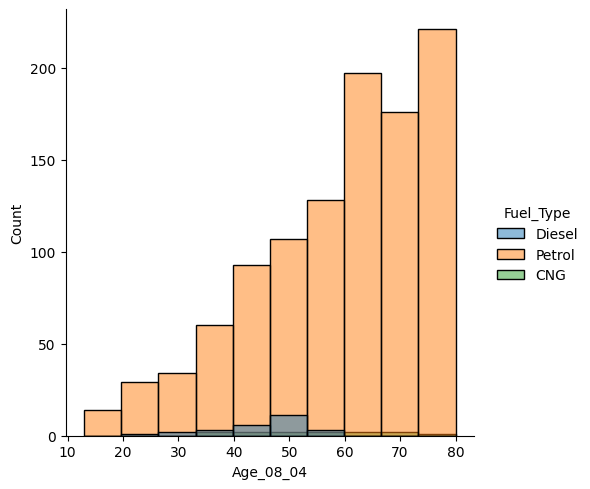

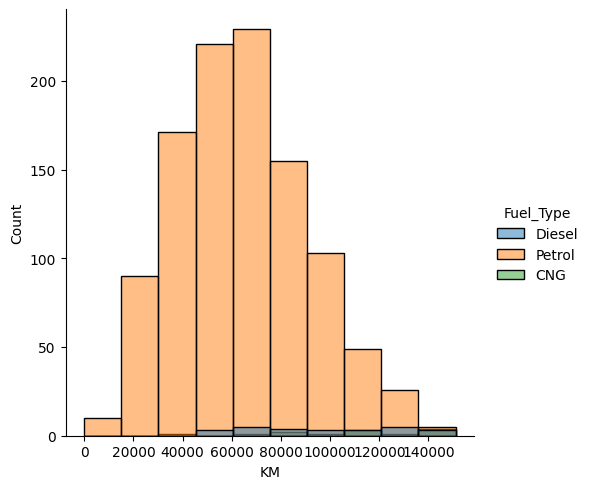

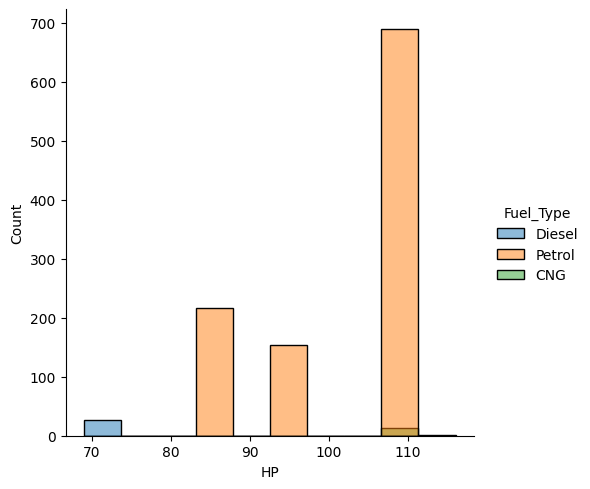

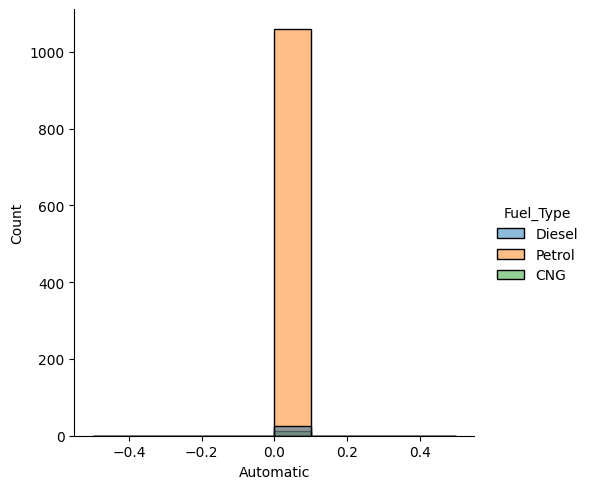

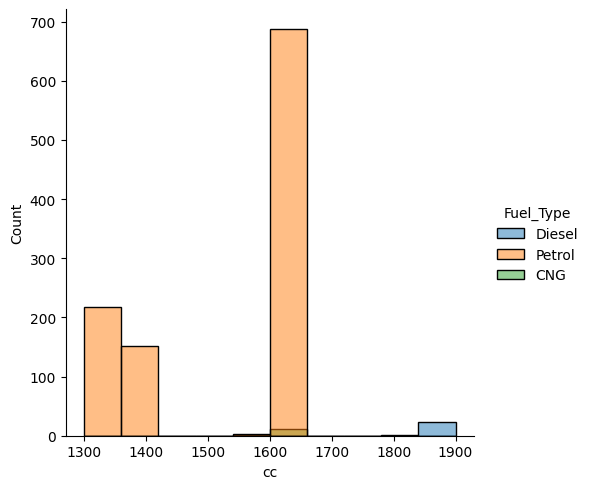

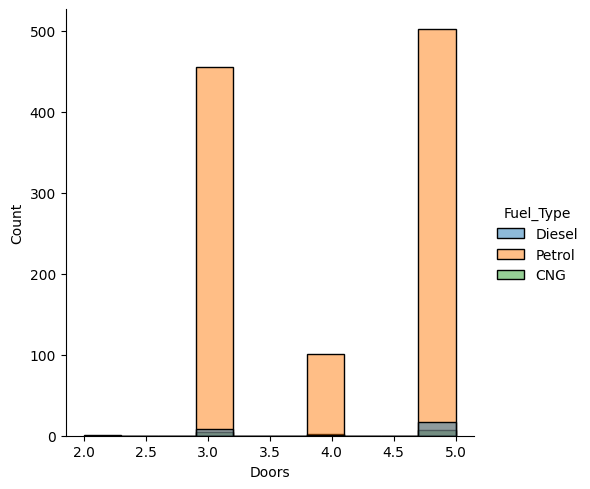

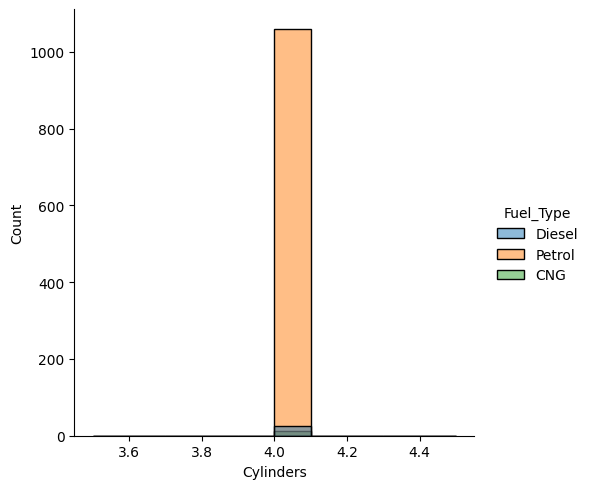

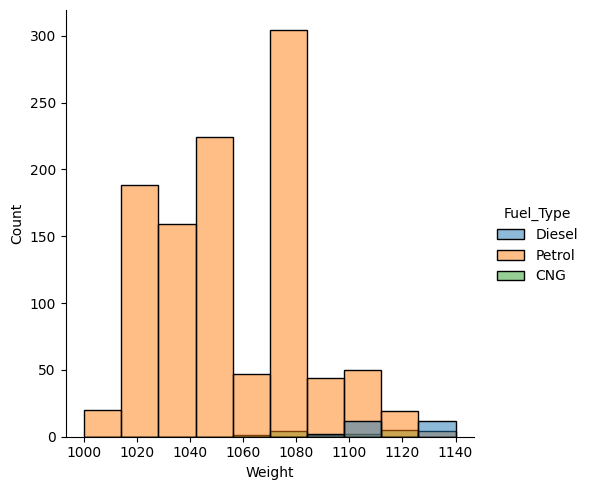

In [24]:
for i in toyoto.describe().columns: #Ploting the histogram for numerical columns
    sns.displot(data=toyoto,x=i,bins=10,hue='Fuel_Type')
    plt.show()

From above histogram plots
* **Price** and **Age** columns are skewed and **KM** coluns is normally distribuated.
* Remaing columns contains some distinct categories except  **Weight** column.
* **Weight** column contains some unusual distributions in the column.

In [25]:
fuel_type = df['Fuel_Type'].value_counts().reset_index()
fuel_type

,Fuel_Type,count
0,Petrol,1264
1,Diesel,154
2,CNG,17


In [26]:
 fig = px.bar(fuel_type,x='Fuel_Type',y='count',template='plotly_dark',color='Fuel_Type') #Ploting the bar plot for fuel type column
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for Fuel Type',title_x=0.5)
fig.show()

From the above plot
* There are 3 different types of categories.
    1. Petrol
    2. Diesel
    3. CNG
* Among those 3 categories max cars are belongs to the petrol

In [27]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [28]:
HP = df['HP'].value_counts().reset_index()
HP
cc =df['cc'].value_counts().reset_index()
cc


,cc,count
0,1600,845
1,1300,248
2,1400,164
3,2000,118
4,1900,30
5,1800,14
6,1598,4
7,1587,4
8,1995,2
9,1332,2


In [29]:
 fig = px.bar(HP,x='HP',y='count',template='plotly_dark',color='HP') #Ploting the bar plot for fuel type column
fig.update_traces(marker_line_color='white',marker_line_width=1.2)
fig.update_layout(title='Bar Plot for HP Type',title_x=0.5)
fig.show()

In [30]:
correlation = df.corr(numeric_only=True)
correlation

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,NaN,0.063831,0.575869
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,NaN,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,NaN,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,NaN,0.209642,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,NaN,-0.098582,0.058499
cc,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,NaN,0.014732,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,NaN,-0.160101,0.301734
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,NaN,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,NaN,0.021238,1.000000


<Axes: >

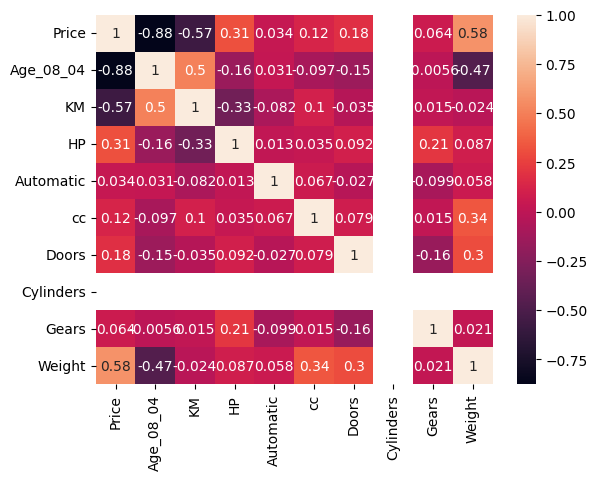

In [31]:
sns.heatmap(correlation, annot = True)

From the above correlation plot
* Price and Age are Hightly negatively correlated, It means when the Age of a car is increased then price of a cars is decreased. Vice Versa.
* Price and KM, Weight are moderatley correlated with each other.


In [33]:
fig = px.scatter(df,x='Age_08_04',y='Price',template='plotly_dark',color='Price') #Finding the correlation between price and age using scatter plot
fig.update_layout(title='Scatter Plot for Age and Price')
fig.show()

In [34]:
fig = px.scatter(df,y='Weight',x='KM',template='plotly_dark',color='Weight') #Finding the coreelation between weight and km
fig.show()

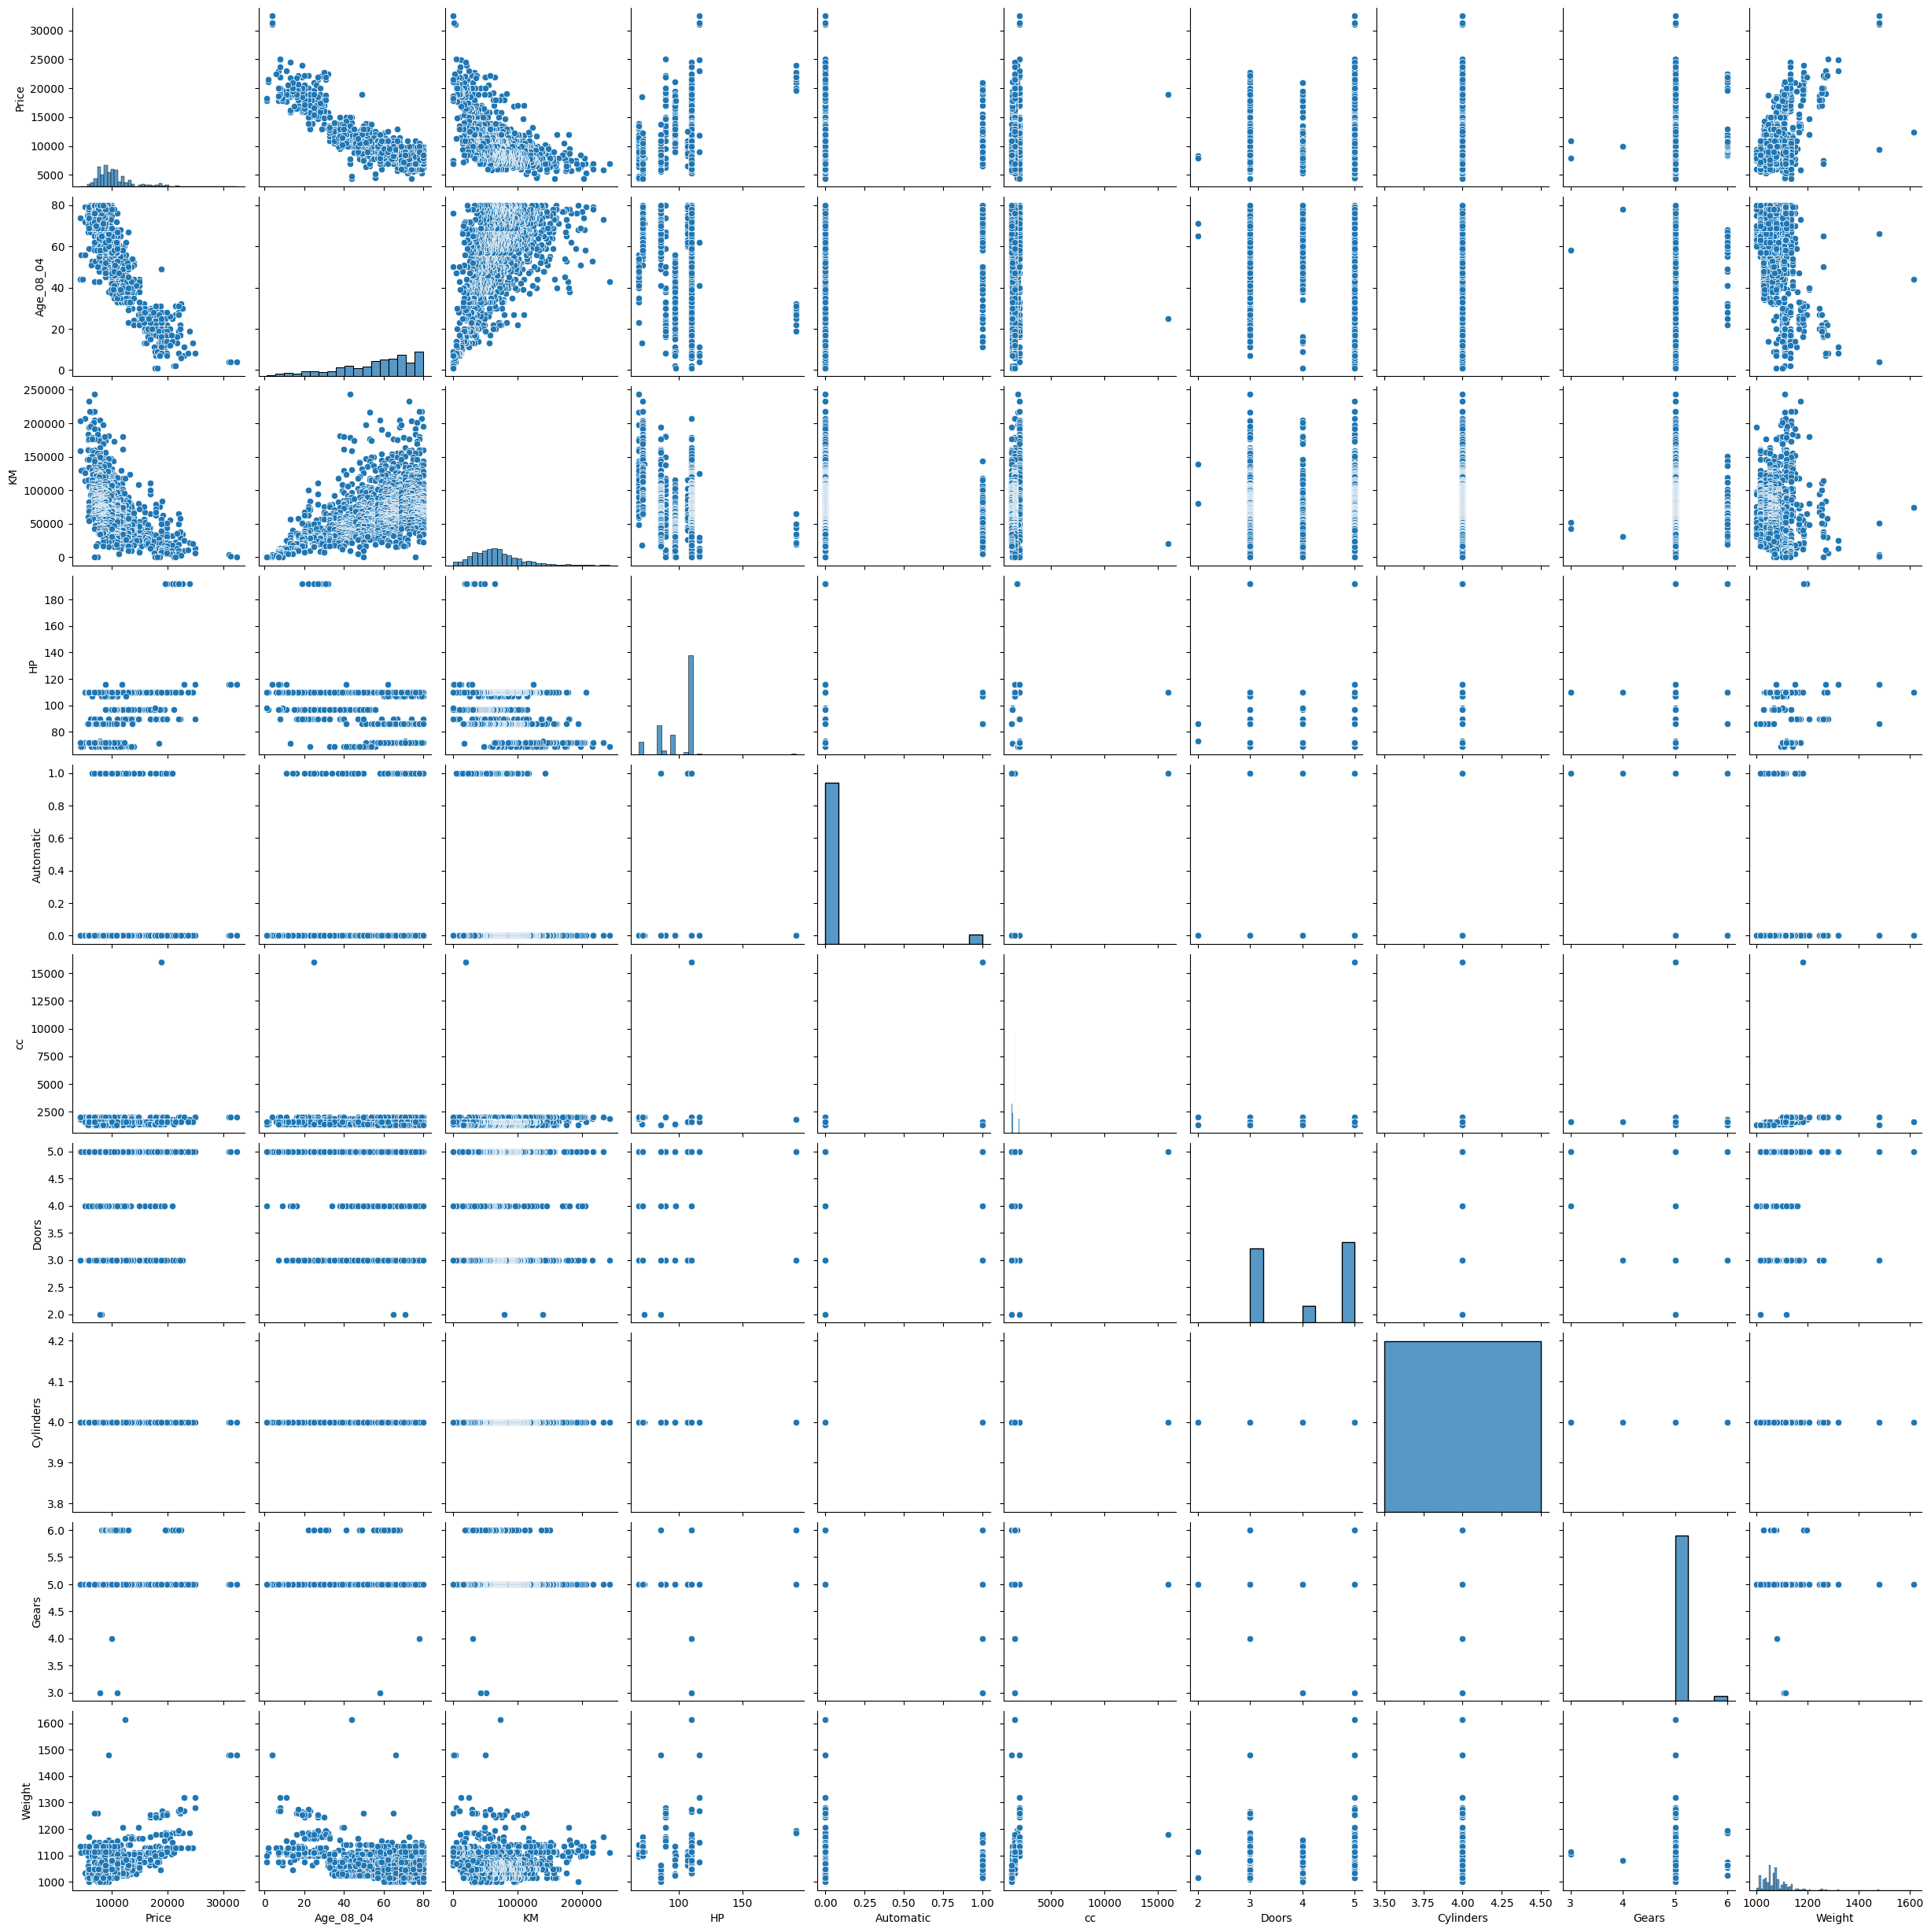

In [35]:
sns.pairplot(df[df.describe().columns]) #Ploting the pair plot for finding the correlation between each column in the dataset
plt.show()

In [51]:
#df.drop('Fuel_Type',axis=1,inplace=True) #Removing the fuel type column because we have dummy values instead of that
#df.head()

In [37]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025
1432,10845,72,19000,86,0,1300,3,4,5,1015
1433,8500,71,17016,86,0,1300,3,4,5,1015
1434,7250,70,16916,86,0,1300,3,4,5,1015


In [38]:

from sklearn.linear_model import LinearRegression #Importing the regression model
from sklearn.model_selection import train_test_split #importing the train test split module from scikit learn

In [52]:
Y1 = toyoto['Price'] #separating the dependent and independent variables
Y2 = toyoto['Price']
Y3 = toyoto['Price']
x1 = toyoto.drop(columns=['Price','Weight','Age_08_04','Fuel_Type'])
x2 = toyoto.drop(columns=['Price','KM','Age_08_04','Fuel_Type'])
x3 = toyoto.drop(columns=['Price','KM','Weight','Fuel_Type'])

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [53]:
X1_train,X1_test,y1_train,y1_test = train_test_split(x1,Y1,random_state=42,test_size=0.2) #Separating the dependent and independent variables as train,test data
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,Y2,random_state=42,test_size=0.2)
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,Y3,random_state=42,test_size=0.2)

In [54]:
print("Train Data :",X1_train.shape,y1_train.shape) #Finding the shape of train and test data
print("Test Data :",X1_test.shape,y1_test.shape)

Train Data : (878, 6) (878,)
Test Data : (220, 6) (220,)


# 3.Build a multiple linear regression model using the training dataset.

In [55]:
model1 = LinearRegression() #Accessing the linear regression model
model2 = LinearRegression()
model3 = LinearRegression()

In [56]:
model1.fit(X1_train,y1_train) #Training the models
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

LinearRegression()

In [57]:
print(f"Intercept: {model1.intercept_}") #Finding the intercepts of model

Intercept: 7877.835914377788


In [58]:
for i,j in enumerate(x1.columns):
    print(f"The coefficient for {j} is {model1.coef_[i]}") #Finding the coefficients of each column

The coefficient for KM is -0.047450056633946365
The coefficient for HP is -6.301868217145228
The coefficient for Automatic is -7.105427357601002e-15
The coefficient for cc is 2.9528612626323056
The coefficient for Doors is 354.6366044816886
The coefficient for Cylinders is 0.0


# Interpreting the Beta Coefficients For Model1

- With a unit increase in KM, we shall see 0.042283 unit decrease in the Price
- With a unit increase in HP, we shall see 587.562657 unit increase in the Price
- With a unit increase in cc, we shall see 43.1766255 unit decrease in the Price
- With a unit increase in Doors, we shall see 339.206170 unit increase in the Price
- With a unit increase in Diesel, we shall see 36532.122813 unit increase in the Price
- With a unit increase in Petrol, we shall see 1914.468598 unit decrease in the Price

In [59]:
print(f"Intercept: {model2.intercept_}") #Finding the intercepts of model

Intercept: -45731.61117624396


In [60]:
for i,j in enumerate(x2.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model2.coef_[i]}")

The coefficient for HP is 33.65341219628294
The coefficient for Automatic is -5.506706202140776e-13
The coefficient for cc is -7.076604363449123
The coefficient for Doors is -404.5092402407376
The coefficient for Cylinders is 0.0
The coefficient for Weight is 61.2306329928906


# Interpreting the Beta Coefficients For Model2

- With a unit increase in Weight, we shall see 52.053636 unit increase in the Price
- With a unit increase in HP, we shall see 559.550470 unit increase in the Price
- With a unit increase in cc, we shall see 46.729707 unit decrease in the Price
- With a unit increase in Doors, we shall see 299.362345 unit decrease in the Price
- With a unit increase in Diesel, we shall see 35743.113569 unit increase in the Price
- With a unit increase in Petrol, we shall see 1491.077150 unit increase in the Price

In [61]:
print(f"Intercept: {model3.intercept_}") #Finding the intercepts of model

Intercept: 15078.381197015691


In [62]:
for  i,j in enumerate(x3.columns): #Finding the coefficients of each column
    print(f"The coefficient for {j} is {model3.coef_[i]}")

The coefficient for Age_08_04 is -129.49419229161828
The coefficient for HP is 27.0740199534511
The coefficient for Automatic is 1.438849039914203e-13
The coefficient for cc is -0.5768349835822377
The coefficient for Doors is 164.29974515063535
The coefficient for Cylinders is 0.0


# Interpreting the Beta Coefficients For Model1

- With a unit increase in Age, we shall see 132.612994 unit decrease in the Price
- With a unit increase in HP, we shall see 56.796965 unit decrease in the Price
- With a unit increase in cc, we shall see 5.941589 unit increase in the Price
- With a unit increase in Doors, we shall see 162.309845 unit increase in the Price
- With a unit increase in Diesel, we shall see 4874.270402 unit decrease in the Price
- With a unit increase in Petrol, we shall see 606.759418 unit increase in the Price

In [64]:
Y1_pred = model1.predict(X1_test) #Predict the datapoints using the trained model with the help of test data
Y2_pred = model2.predict(X2_test)
Y3_pred = model3.predict(X3_test)

# Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

# Performance Metrics for Model1

In [65]:
def adj_r2(a,b,c): #Creating a function for calculate adj r2 value of models
    r2 = metrics.r2_score(a,b) #To find the r squared value of model
    n = 878 #length of sample size taken from shape of x_train
    p = len(c.coef_) #Find the no of coefficient values
    return 1-(1-r2)*(n-1)/(n-p-1) #Return adjusted r squared value

In [68]:
from sklearn import metrics #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, Y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, Y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, Y1_pred)))
print('R_Squared Error :',metrics.r2_score(y1_test, Y1_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, Y1_pred,model1))

Mean Absolute Error: 1471.9664851913926
Mean Squared Error: 3768510.1104249437
Root Mean Squared Error: 1941.26507989634
R_Squared Error : 0.35582362107769694
Adj R_Squared Error : 0.3513861259301265


# Performance Metrics for Model2

In [70]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, Y2_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, Y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, Y2_pred)))
print('R_Squared Error :',metrics.r2_score(y2_test, Y2_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, Y2_pred,model2))

Mean Absolute Error: 1547.230646635402
Mean Squared Error: 3734883.9674930917
Root Mean Squared Error: 1932.5847892118709
R_Squared Error : 0.3615715602781364
Adj R_Squared Error : 0.3571736605785599


# Performance Metrics for Model3

In [72]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, Y3_pred)) #Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset for model1
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, Y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, Y3_pred)))
print('R_Squared Error :',metrics.r2_score(y3_test, Y3_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, Y3_pred,model3))

Mean Absolute Error: 899.558349779005
Mean Squared Error: 1279305.3125239604
Root Mean Squared Error: 1131.063796840815
R_Squared Error : 0.7813198745366181
Adj R_Squared Error : 0.7798134672429553


# Apply Lasso and Ridge methods on the model.

In [73]:
from sklearn.linear_model import Ridge #Applying the redge regression to the train and test data
ridgereg1 = Ridge(alpha=0.01)
ridgereg1.fit(X1_train,y1_train)
y_pred = ridgereg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,ridgereg1))

R_Squared Error : 0.3558234780683881
Adj R_Squared Error : 0.35138598193567894



# Ridge for Model2

In [74]:
ridgereg2 = Ridge(alpha=0.01)
ridgereg2.fit(X2_train,y2_train)
y_pred = ridgereg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,ridgereg2))

R_Squared Error : 0.3615713981159586
Adj R_Squared Error : 0.35717349729930614


# Ridge for Model3

In [75]:
ridgereg3 = Ridge(alpha=0.01)
ridgereg3.fit(X3_train,y3_train)
y_pred = ridgereg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test, y_pred,ridgereg3))

R_Squared Error : 0.7813197973774996
Adj R_Squared Error : 0.7798133895523158


# Lasso for Model1

In [76]:
from sklearn.linear_model import Lasso #Applying the lasso regression to the train and test data
lassoreg1 = Lasso(alpha=0.01)
lassoreg1.fit(X1_train,y1_train)
y_pred = lassoreg1.predict(X1_test)
print('R_Squared Error :',metrics.r2_score(y1_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y1_test, y_pred,lassoreg1))

R_Squared Error : 0.3558231695885674
Adj R_Squared Error : 0.35138567133085374


# Lasso for Model2

In [77]:
lassoreg2 = Lasso(alpha=0.01)
lassoreg2.fit(X2_train,y2_train)
y_pred = lassoreg2.predict(X2_test)
print('R_Squared Error :',metrics.r2_score(y2_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y2_test, y_pred,lassoreg2))

R_Squared Error : 0.36157119450927966
Adj R_Squared Error : 0.35717329229005546


# Lasso for Model3

In [78]:
lassoreg3 = Lasso(alpha=0.01)
lassoreg3.fit(X3_train,y3_train)
y_pred = lassoreg3.predict(X3_test)
print('R_Squared Error :',metrics.r2_score(y3_test, y_pred))
print('Adj R_Squared Error :',adj_r2(y3_test,y_pred,lassoreg3))

R_Squared Error : 0.7813194247353862
Adj R_Squared Error : 0.7798130143432075


#Interview Questions:

#1.Normalization and Standardization are feature scaling techniques used to bring all input features to a similar scale.

Normalization:

Also called: Min-Max Scaling

Formula:

𝑥
′
=
𝑥
−
min
(
𝑥
)
max
(
𝑥
)
−
min
(
𝑥
)
x
′
=
max(x)−min(x)
x−min(x)
	​


Range: Scales data between 0 and 1

Use Case: When features have different ranges and distance-based algorithms (e.g., KNN, SVM) are used.

Standardization:

Also called: Z-score Scaling

Formula:

𝑥
′
=
𝑥
−
𝜇
𝜎
x
′
=
σ
x−μ
	​


Range: Mean = 0, Std Dev = 1

Use Case: When data is normally distributed or for linear models like regression, logistic regression, PCA.

Why it's helpful:

Speeds up training.

Prevents dominance of features with large values.

Improves model performance and convergence.

#2. What techniques can be used to address multicollinearity in multiple linear regression?

Multicollinearity occurs when independent variables are highly correlated, making coefficient estimates unstable.

Detection:

Correlation Matrix

Variance Inflation Factor (VIF): VIF > 5 or 10 indicates high multicollinearity.

Techniques to Address It:

Remove correlated variables

Drop one of the variables with high VIF.

Combine variables

Use feature engineering or domain knowledge to merge similar variables.

Use Principal Component Analysis (PCA)

Transforms correlated features into uncorrelated components.

Regularization techniques

Ridge Regression (L2): Reduces impact of multicollinearity by shrinking coefficients.

Lasso Regression (L1): Can shrink some coefficients to zero, effectively removing them.